
==> Hadamard walk in 1D, but represented in a 2D space

#### Coin operator

 $C \ = \ \frac{1}{\sqrt{2}}\begin{pmatrix} 1 && 1 \\ -1 && 1 \end{pmatrix} $
 
#### Translation operators 
 $Tx \ =  Ix \otimes Iy \otimes Ip $
  
  $Ty \ = Ix \otimes \ \displaystyle\sum_{y} \ \lvert y \ + \ 1\rangle\langle y\lvert  \ \otimes \ \lvert R\rangle\langle R\lvert  \ + Ix \otimes \ \displaystyle\sum_{y} \ \lvert y \ - \ 1\rangle\langle y\lvert \otimes \ \lvert L \rangle\langle L\lvert  \ $

#### Protocol 
$U \ = \ Ty Tx (C \otimes Ix \otimes Iy) $ 



In [1]:
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import pandas as pd
from scipy.sparse import csr_matrix

In [43]:
N = 2  # number of random steps
P = 2*N+1   # number of positions

In [44]:
ket0 = array([1, 0])  # |0>
ket1 = array([0, 1])  # |1>

C00 = outer(ket0, ket0)  # |0><0| 
C01 = outer(ket0, ket1)  # |0><1| 
C10 = outer(ket1, ket0)  # |1><0| 
C11 = outer(ket1, ket1)  # |1><1| 

I = C00 + C11  #identity

In [45]:
#Coin
C = (C00 + C01 - C10 + C11)/sqrt(2.) 

In [46]:
iden = csr_matrix((P, P),dtype = np.int8).toarray()
for i in range(P):
    iden[i][i] = 1

In [47]:
def Plot2D(qw, steps):
    figure(1)
    ax1 = subplot(111)
    sca(ax1)
    title('2D distribution of %s steps Quantum Walk with hadamard coin' % steps)
    xlabel('X Position (started in center)')
    imshow(qw)

### Translation operators

#### Tx

In [48]:
LPs = roll(iden, 1, axis=0)
LP = kron(iden,kron(LPs, C00))

LMs = roll(iden, -1, axis=0)
LM = kron(iden, kron(LMs, C11))

Tx = LP + LM
shape(Tx)

(50, 50)

#### Ty

In [49]:
range_ = kron(iden, kron(iden, eye(2)))
rangee = shape(range_)
rangeee = rangee[0]
rangeee

50

In [50]:
#Making Ty = Iy
Ty = csr_matrix((rangeee, rangeee), dtype = float).toarray()
for i in range(rangeee):
    Ty[i][i] = 1

shape(Ty)    

(50, 50)

### Protocol 

$Coin = Ix \otimes Iy \otimes C $

$U = Ty Tx Coin$

In [51]:
#Protocol
Coin = kron(eye(P), kron(eye(P),C))
U = Ty.dot(Tx.dot(Coin))

shape(U)

(50, 50)

### Initial State

In [52]:
initialPositionx = zeros(P)
initialPositionx[N] = 1
initialPositiony = zeros(P)
initialPositiony[N] = 1

psi0 = kron(initialPositionx,kron(initialPositiony,(ket0+ket1*1j)/sqrt(2.)))
    
shape(psi0)    

(50,)

### Final State

In [53]:
#State after N random quantum steps.
psiN = linalg.matrix_power(U, N).dot(psi0) 

shape(psiN)    

(50,)

### Measurement operator and position on the map

In [54]:
xy_probability = csr_matrix((P, P), dtype = float).toarray()
for x in range(P):
    positionx = zeros(P)
    positionx[x] = 1
    for y in range(P):
        positiony = zeros(P)
        positiony[y] = 1
        for p in range(2): 
            polarization = zeros(2)
            polarization[p] = 1
            posn = kron(positionx,positiony) 
            M_hat_k = M_hat_k =kron(outer(posn,posn), eye(2)) 
            proj = M_hat_k.dot(psiN)
            xy_probability[x][y] = proj.dot(proj.conjugate()).real


In [55]:
xy_probability

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.5 , 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

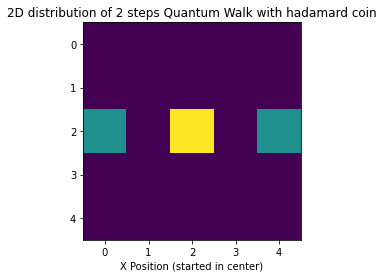

In [57]:
Plot2D(xy_probability,2)

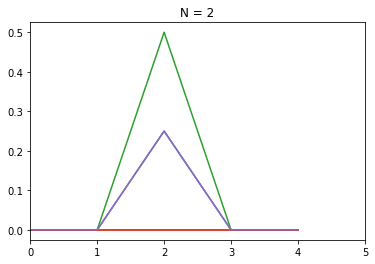

In [56]:
#Plot
fig = figure()
ax = fig.add_subplot(111)

plot(arange(P), xy_probability)
title("N = 2")
xlim(0, P)

show()

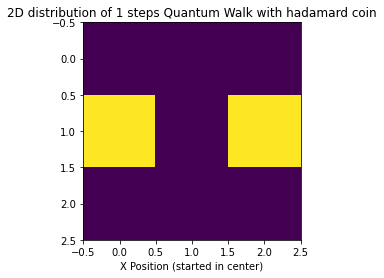

In [22]:
Plot2D(xy_probability,1)

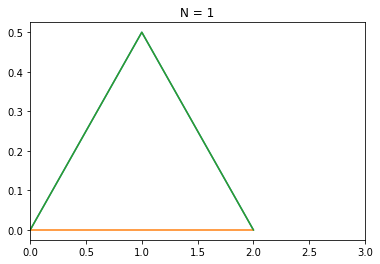

In [19]:
#Plot
fig = figure()
ax = fig.add_subplot(111)

plot(arange(P), xy_probability)
title("N = 1")
xlim(0, P)

show()

==>  Hadamard walk in 1D, but represented in a 2D space

#### Coin operator

 $C \ = \ \frac{1}{\sqrt{2}}\begin{pmatrix} 1 && 1 \\ -1 && 1 \end{pmatrix} $
 
#### Translation operators 
 $Tx \ = \ \displaystyle\sum_{x} \ \lvert x \ + \ 1\rangle\langle x\lvert  \ \otimes Iy \otimes \lvert R\rangle\langle R\lvert  \ \otimes \ + \displaystyle\sum_{x} \ \lvert x \ - \ 1\rangle\langle x\lvert \otimes Iy \otimes\ \lvert L \rangle\langle L\lvert  \  $
 
  $Ty \ =  Ix \otimes Iy \otimes Ip  \ $
#### Protocol 
$U \ = \ Ty Tx (C \otimes Ix \otimes Iy) $ 


In [58]:
#Translation operator in y

LPlus_ = eye(P)
LPlus_ = LPlus_.tolist()
LPluss = [row[1:] + row[:1] for row in LPlus_]
LPlus = kron(LPluss, kron(eye(P), C00))

LMinus_ = eye(P)
LMinus_ = LMinus_.tolist()
LMinuss = [row[-1:] + row[:-1] for row in LMinus_]
LMinus = kron(LMinuss, kron(eye(P), C11))

#Tx
Ty = LPlus + LMinus

shape(Ty)

(50, 50)

In [59]:
#Making Tx = Ix
Tx = csr_matrix((rangeee, rangeee), dtype = float).toarray()
for i in range(rangeee):
    Tx[i][i] = 1

In [60]:
#Protocol
Coin = kron(eye(P), kron(eye(P),C))
U = Ty.dot(Tx.dot(Coin))

shape(U)

(50, 50)

In [61]:
initialPositionx = zeros(P)
initialPositionx[N] = 1
initialPositiony = zeros(P)
initialPositiony[N] = 1

psi0 = kron(initialPositionx,kron(initialPositiony,(ket0+ket1*1j)/sqrt(2.)))


In [62]:
#State after N random quantum steps.
psiN = linalg.matrix_power(U, N).dot(psi0) 


In [63]:
xy_probability = csr_matrix((P, P), dtype = float).toarray()
for x in range(P):
    positionx = zeros(P)
    positionx[x] = 1
    for y in range(P):
        positiony = zeros(P)
        positiony[y] = 1
        for p in range(2): 
            polarization = zeros(2)
            polarization[p] = 1
            posn = kron(positionx,positiony) 
            M_hat_k = M_hat_k =kron(outer(posn,posn), eye(2)) 
            proj = M_hat_k.dot(psiN)
            xy_probability[x][y] = proj.dot(proj.conjugate()).real

In [64]:
xy_probability

array([[0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  ]])

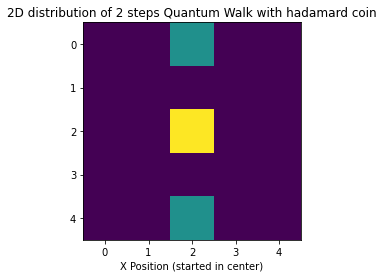

In [65]:
Plot2D(xy_probability,2) 

<b>Protocol</b>: Hadamard walk 2D

#### Coin operator

 $C \ = \ \frac{1}{\sqrt{2}}\begin{pmatrix} 1 && 1 \\ -1 && 1 \end{pmatrix} $
 
#### Translation operators 
 $Tx \ = \ \displaystyle\sum_{x} \ \lvert x \ + \ 1\rangle\langle x\lvert  \ \otimes Iy \otimes \lvert R\rangle\langle R\lvert  \ \otimes \ + \displaystyle\sum_{x} \ \lvert x \ - \ 1\rangle\langle x\lvert \otimes Iy \otimes\ \lvert L \rangle\langle L\lvert  \  $
 
  $Ty \ = Ix \otimes \ \displaystyle\sum_{y} \ \lvert y \ + \ 1\rangle\langle y\lvert  \ \otimes \ \lvert R\rangle\langle R\lvert  \ + Ix \otimes \ \displaystyle\sum_{y} \ \lvert y \ - \ 1\rangle\langle y\lvert \otimes \ \lvert L \rangle\langle L\lvert  \ $
#### Protocol 
$U \ = \ Ty Tx (C \otimes Ix \otimes Iy) $ 



#### Tx

In [66]:
LPs = roll(iden, 1, axis=0)
LP = kron(iden,kron(LPs, C00))

LMs = roll(iden, -1, axis=0)
LM = kron(iden, kron(LMs, C11))

Tx = LP + LM
shape(Tx)

(50, 50)

#### Ty

In [67]:
LPlus_ = eye(P)
LPlus_ = LPlus_.tolist()
LPluss = [row[1:] + row[:1] for row in LPlus_]
LPlus = kron(LPluss, kron(eye(P), C00))

LMinus_ = eye(P)
LMinus_ = LMinus_.tolist()
LMinuss = [row[-1:] + row[:-1] for row in LMinus_]
LMinus = kron(LMinuss, kron(eye(P), C11))

#Tx
Ty = LPlus + LMinus

shape(Ty)

(50, 50)

#### Protocol

In [68]:
#Protocol
Coin = kron(eye(P), kron(eye(P),C))
U = Ty.dot(Coin.dot(Tx.dot(Coin))) 

shape(U)


(50, 50)

#### Initial State

In [69]:
initialPositionx = zeros(P)
initialPositionx[N] = 1
initialPositiony = zeros(P)
initialPositiony[N] = 1

psi0 = kron(initialPositionx,kron(initialPositiony,(ket0+ket1*1j)/sqrt(2.)))


#### Final State

In [70]:
#State after N random quantum steps.
psiN = linalg.matrix_power(U, N).dot(psi0) 

    
shape(psiN)  

(50,)

#### Measurement

In [71]:
xy_probability = csr_matrix((P, P), dtype = float).toarray()
for x in range(P):
    positionx = zeros(P)
    positionx[x] = 1
    for y in range(P):
        positiony = zeros(P)
        positiony[y] = 1
        for p in range(2): 
            polarization = zeros(2)
            polarization[p] = 1
            posn = kron(positionx,positiony) 
            M_hat_k = M_hat_k =kron(outer(posn,posn), eye(2)) 
            proj = M_hat_k.dot(psiN)
            xy_probability[x][y] = proj.dot(proj.conjugate()).real


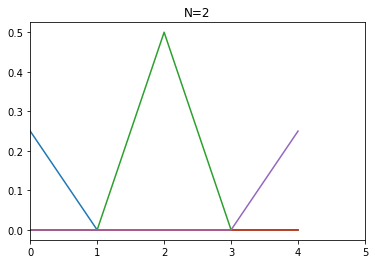

In [73]:
#Plot
fig = figure()
ax = fig.add_subplot(111)

plot(arange(P), xy_probability)
#plot(arange(P), xy_probability, 'o')
title("N=2")
xlim(0, P)

show()

### Results

In [19]:
xy_probability #N =1 

array([[0.25, 0.  , 0.25],
       [0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.25]])

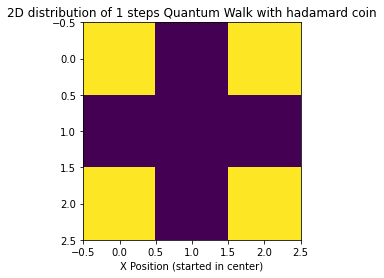

In [20]:
Plot2D(xy_probability,1) #-- N = 2 

In [40]:
xy_probability #N =2 

array([[0.0625, 0.    , 0.125 , 0.    , 0.0625],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.125 , 0.    , 0.25  , 0.    , 0.125 ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0625, 0.    , 0.125 , 0.    , 0.0625]])

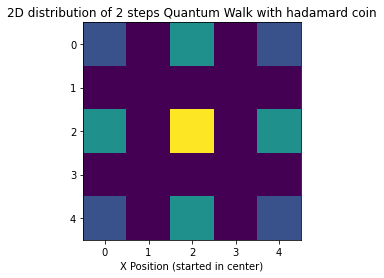

In [41]:
Plot2D(xy_probability,2) #-- N = 2

In [45]:
xy_probability #N =3 

array([[0.125, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.375, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.375, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.125]])

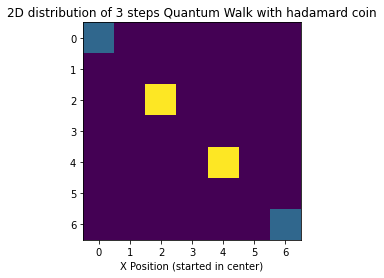

In [46]:
Plot2D(xy_probability,3) #-- N = 2

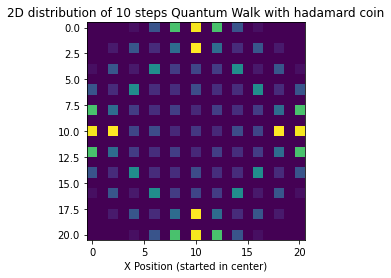

In [73]:
Plot2D(xy_probability,10) #-- N = 10